<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.



# Importing Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [7]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df2.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


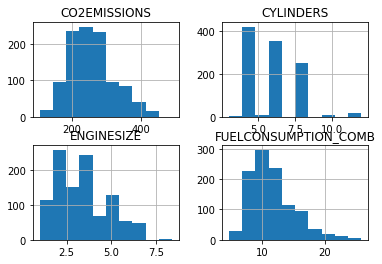

In [8]:
df2.hist()
plt.show()

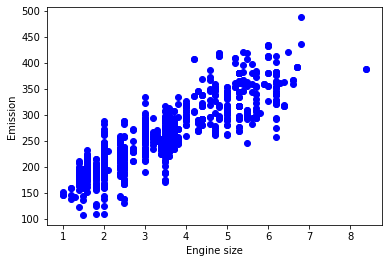

In [9]:
plt.scatter(df2.ENGINESIZE, df2.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
X = df2[["ENGINESIZE"]]
Y = df2['CO2EMISSIONS']

# Training And Testing Set

# #Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.

In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])




number of test samples : 214
number of training samples: 853


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm=LinearRegression()

In [14]:
lm.fit(x_train, y_train)

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
Yhat=lm.predict(x_train)
Yhat[0:5]   

array([243.01671902, 377.02899266, 223.30903173, 313.9643933 ,
       282.43209362])

In [16]:
lm.intercept_

124.770595231584

In [17]:
lm.coef_

array([39.4153746])

In [18]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 507.17110193213637)

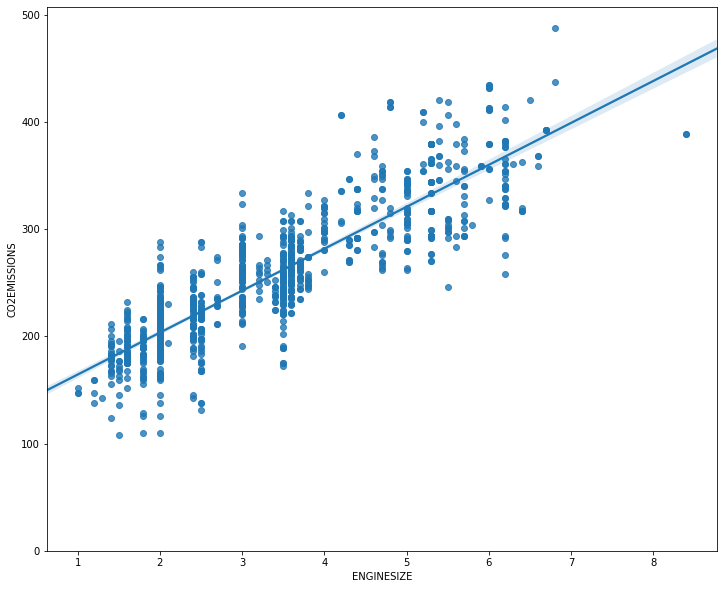

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="ENGINESIZE", y='CO2EMISSIONS', data=df2)
plt.ylim(0,)

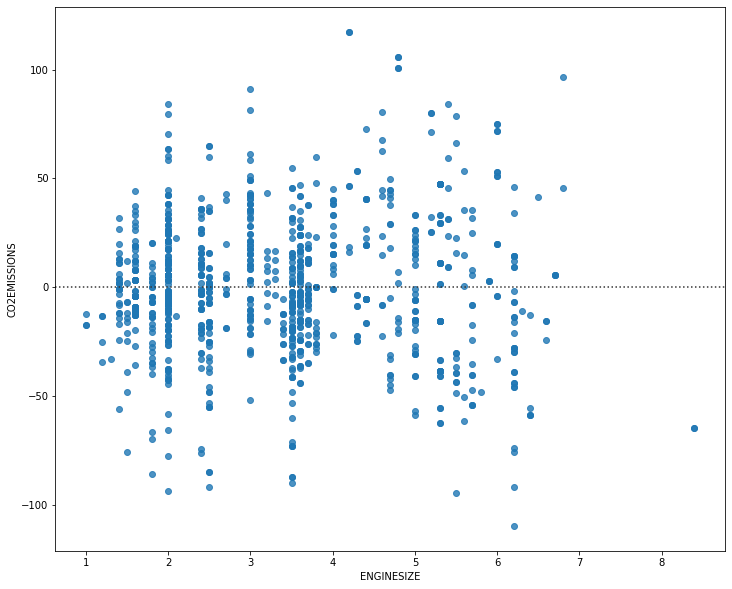

In [20]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x="ENGINESIZE", y='CO2EMISSIONS', data=df2)
plt.show()

In [52]:
lm.fit(x_train, y_train)
# Find the R^2
print('The R-square is: ', lm.score(x_train, y_train))

The R-square is:  0.7639480562303455


In [28]:
Yhat=lm.predict(x_test)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [243.01671902 179.95211967 203.60134443 203.60134443]


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  955.3707648173709


<h2>Cross-validation Score</h2>

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
Rcross = cross_val_score(lm, x_train, y_train, cv=4)

In [33]:
Rcross

array([0.78630902, 0.75811381, 0.77605387, 0.70377739])

In [34]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7560635223253876 and the standard deviation is 0.031829418084194844


In [35]:
yhat_train = lm.predict(x_train)
yhat_train[0:5]

array([243.01671902, 377.02899266, 223.30903173, 313.9643933 ,
       282.43209362])

In [56]:
print("Predicted values:", yhat_train[0:5])
print("True values:", y_train[0:4].values)

Predicted values: [243.01671902 377.02899266 223.30903173 313.9643933  282.43209362]
True values: [285 317 218 320]


In [36]:
yhat_test = lm.predict(x_test)
yhat_test[0:5]

array([243.01671902, 179.95211967, 203.60134443, 203.60134443,
       306.08131838])

In [58]:
print("Predicted values:", yhat_test[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [243.01671902 179.95211967 203.60134443 203.60134443]
True values: [274 200 196 161]


In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [60]:
mse = mean_squared_error(y_test, yhat_test)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  955.3707648173709


In [61]:
mae = mean_absolute_error(y_test, yhat_test)
print('The mean absolute error of price and predicted value is: ', mae)

The mean absolute error of price and predicted value is:  23.206541542107974


Text(0, 0.5, 'Emission')

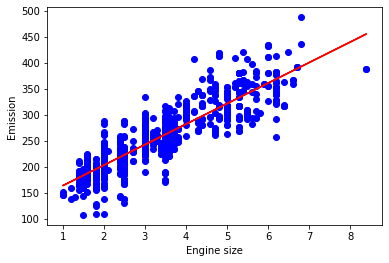

In [62]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, lm.coef_*x_train + lm.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>